##### Install the libraries

In [ ]:
pip install fbprophet -U

##### Dataset

In [1]:
# Dataset: monthly-car-sales.csv
# Location: https://mitu.co.in/dataset

##### Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Read the data

In [5]:
df = pd.read_csv('monthly-car-sales.csv')

In [6]:
df

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


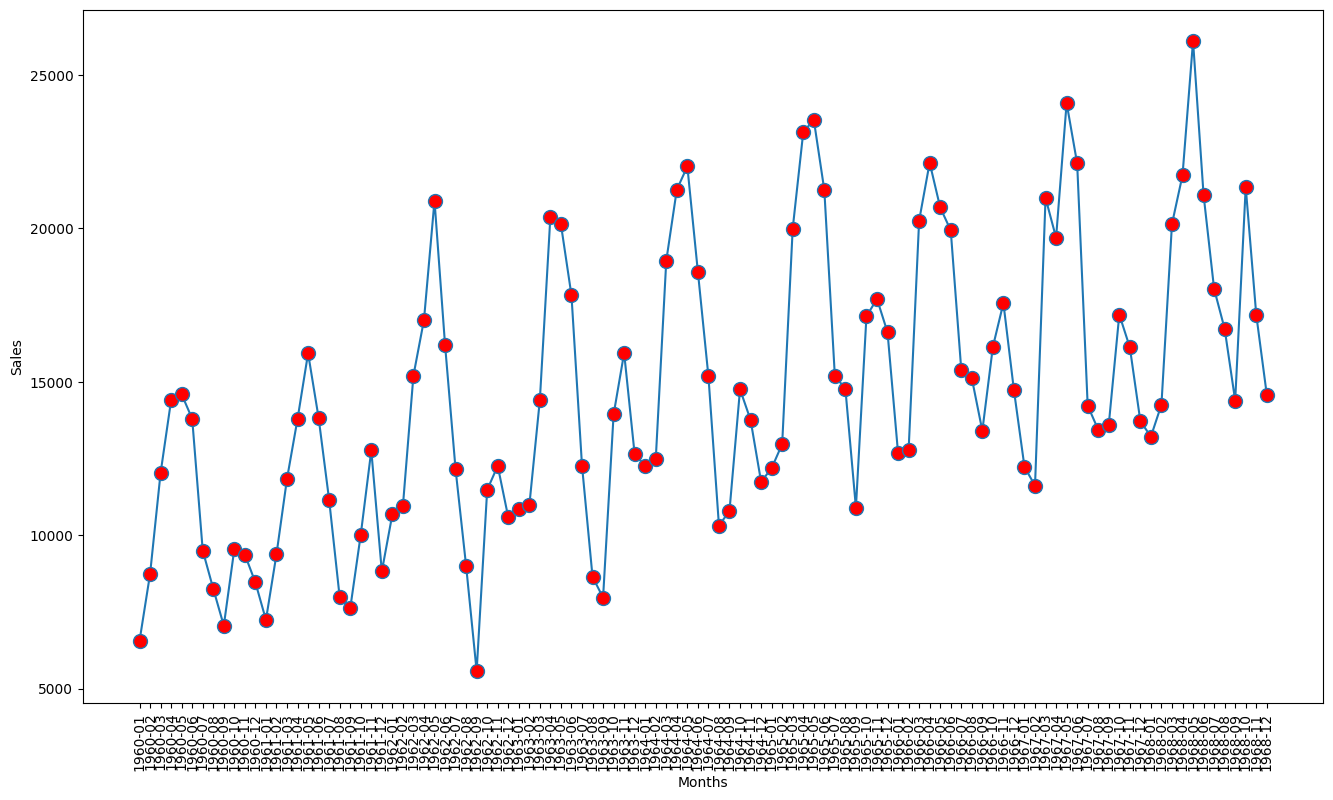

In [7]:
plt.figure(figsize=(16,9))
plt.xlabel('Months')
plt.ylabel('Sales')
plt.xticks(rotation='vertical')
plt.plot(df['Month'], df['Sales'], marker = 'o', mfc = 'r', ms=10)

In [8]:
df.columns

Index(['Month', 'Sales'], dtype='object')

In [9]:
df.columns = ['ds','y']

In [10]:
df

,ds,y
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


In [11]:
df.dtypes

ds    object
y      int64
dtype: object

In [12]:
# prepare expected column names
df['ds']= pd.to_datetime(df['ds'])

In [13]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [14]:
df

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587
...,...,...
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180


In [26]:
import time
time.time()

1713510541.0659745

In [27]:
time.time()

1713510575.6002858

In [28]:
time.asctime()

'Fri Apr 19 12:39:43 2024'

In [29]:
time.localtime()

time.struct_time(tm_year=2024, tm_mon=4, tm_mday=19, tm_hour=12, tm_min=40, tm_sec=59, tm_wday=4, tm_yday=110, tm_isdst=0)

In [15]:
df.iloc[2,0]

Timestamp('1960-03-01 00:00:00')

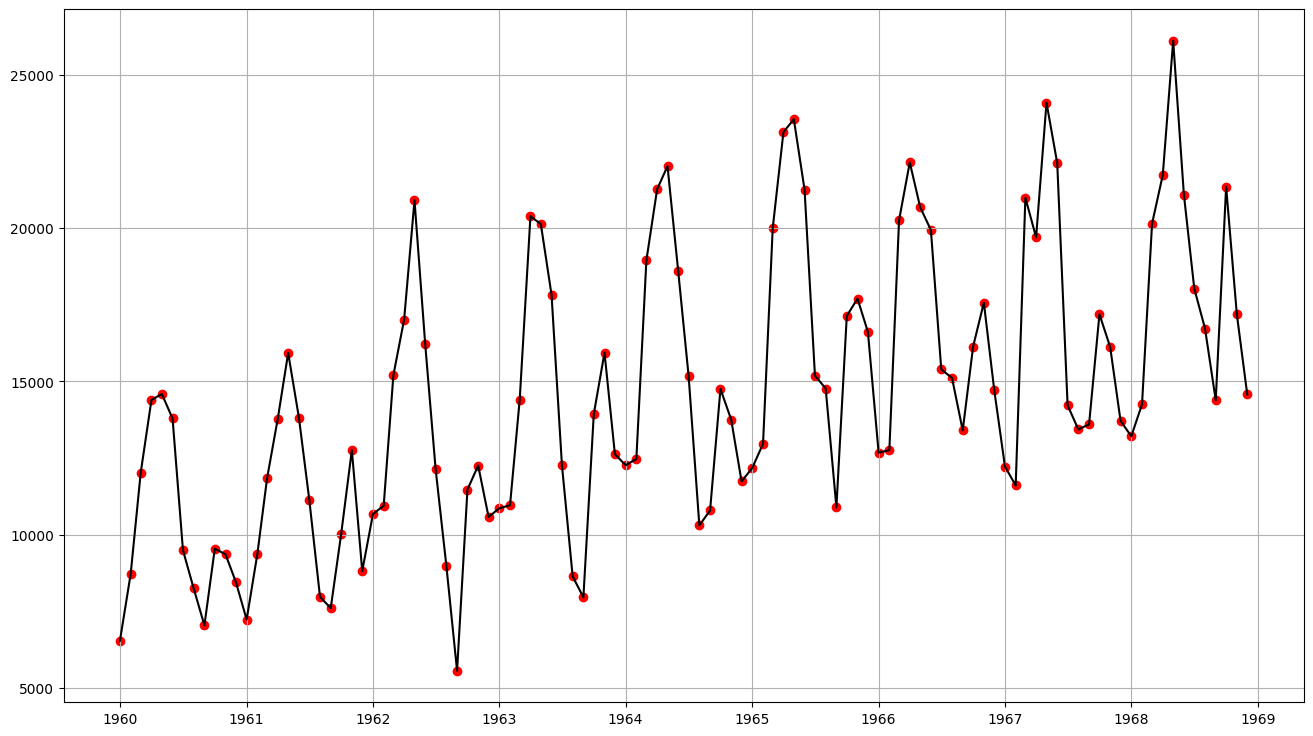

In [16]:
# explore the data
plt.figure(figsize=(16,9))
plt.grid()
plt.scatter(df['ds'], df['y'], color='r')
plt.plot(df['ds'], df['y'], color='k')

In [17]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [18]:
model = Prophet(weekly_seasonality=True, daily_seasonality=True)

In [19]:
model.fit(df)

17:49:10 - cmdstanpy - INFO - Chain [1] start processing
17:49:10 - cmdstanpy - INFO - Chain [1] done processing


In [39]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
    date = '1969-%02d' % i
    future.append([date])

for i in range(1, 13):
    date = '1970-%02d' % i
    future.append([date])

for i in range(1, 13):
    date = '1971-%02d' % i
    future.append([date])

In [40]:
future

[['1969-01'],
 ['1969-02'],
 ['1969-03'],
 ['1969-04'],
 ['1969-05'],
 ['1969-06'],
 ['1969-07'],
 ['1969-08'],
 ['1969-09'],
 ['1969-10'],
 ['1969-11'],
 ['1969-12'],
 ['1970-01'],
 ['1970-02'],
 ['1970-03'],
 ['1970-04'],
 ['1970-05'],
 ['1970-06'],
 ['1970-07'],
 ['1970-08'],
 ['1970-09'],
 ['1970-10'],
 ['1970-11'],
 ['1970-12'],
 ['1971-01'],
 ['1971-02'],
 ['1971-03'],
 ['1971-04'],
 ['1971-05'],
 ['1971-06'],
 ['1971-07'],
 ['1971-08'],
 ['1971-09'],
 ['1971-10'],
 ['1971-11'],
 ['1971-12']]

In [41]:
future = pd.DataFrame(future, columns=['ds'])

In [42]:
future

,ds
0,1969-01
1,1969-02
2,1969-03
3,1969-04
4,1969-05
5,1969-06
6,1969-07
7,1969-08
8,1969-09
9,1969-10


In [43]:
# predict on the future time
forecast = model.predict(future)

In [44]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1969-01-01,16107.318303,14652.239098,17632.716149,16107.318303,16107.424202,-8.375151,-8.375151,-8.375151,2484.917109,...,296.397039,296.397039,296.397039,-2789.689298,-2789.689298,-2789.689298,0.0,0.0,0.0,16098.943152
1,1969-02-01,16166.374341,13329.327997,16503.245248,16165.596854,16167.547829,-1208.370955,-1208.370955,-1208.370955,2484.917109,...,-897.810967,-897.810967,-897.810967,-2795.477096,-2795.477096,-2795.477096,0.0,0.0,0.0,14958.003386
2,1969-03-01,16219.715278,18879.812057,21896.261583,16217.370318,16222.702693,4199.686993,4199.686993,4199.686993,2484.917109,...,-897.810967,-897.810967,-897.810967,2612.580852,2612.580852,2612.580852,0.0,0.0,0.0,20419.402272
3,1969-04-01,16278.771316,22564.101425,25511.061618,16274.311889,16284.215880,7817.877892,7817.877892,7817.877892,2484.917109,...,447.964727,447.964727,447.964727,4884.996057,4884.996057,4884.996057,0.0,0.0,0.0,24096.649209
4,1969-05-01,16335.922321,23825.580367,26952.126707,16329.114741,16344.226981,9081.895187,9081.895187,9081.895187,2484.917109,...,264.051935,264.051935,264.051935,6332.926143,6332.926143,6332.926143,0.0,0.0,0.0,25417.817508
5,1969-06-01,16394.978359,20363.496955,23378.919861,16385.322682,16405.948237,5425.694281,5425.694281,5425.694281,2484.917109,...,-497.106274,-497.106274,-497.106274,3437.883446,3437.883446,3437.883446,0.0,0.0,0.0,21820.672640
6,1969-07-01,16452.129364,17065.093010,20113.978882,16439.539476,16467.079972,2081.604266,2081.604266,2081.604266,2484.917109,...,447.964727,447.964727,447.964727,-851.277569,-851.277569,-851.277569,0.0,0.0,0.0,18533.733630
7,1969-08-01,16511.185402,14089.255225,17193.434316,16495.317811,16529.890948,-792.476034,-792.476034,-792.476034,2484.917109,...,-56.785647,-56.785647,-56.785647,-3220.607496,-3220.607496,-3220.607496,0.0,0.0,0.0,15718.709368
8,1969-09-01,16570.241440,13318.501257,16282.507262,16550.547307,16593.188860,-1727.413045,-1727.413045,-1727.413045,2484.917109,...,443.289188,443.289188,443.289188,-4655.619341,-4655.619341,-4655.619341,0.0,0.0,0.0,14842.828395
9,1969-10-01,16627.392444,17791.332481,20792.643488,16603.684616,16653.827468,2610.780740,2610.780740,2610.780740,2484.917109,...,296.397039,296.397039,296.397039,-170.533408,-170.533408,-170.533408,0.0,0.0,0.0,19238.173184


In [45]:
# summarize the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1969-01-01,16098.943152,14652.239098,17632.716149
1,1969-02-01,14958.003386,13329.327997,16503.245248
2,1969-03-01,20419.402272,18879.812057,21896.261583
3,1969-04-01,24096.649209,22564.101425,25511.061618
4,1969-05-01,25417.817508,23825.580367,26952.126707
5,1969-06-01,21820.672640,20363.496955,23378.919861
6,1969-07-01,18533.733630,17065.093010,20113.978882
7,1969-08-01,15718.709368,14089.255225,17193.434316
8,1969-09-01,14842.828395,13318.501257,16282.507262
9,1969-10-01,19238.173184,17791.332481,20792.643488


/home/mitu/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/mitu/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


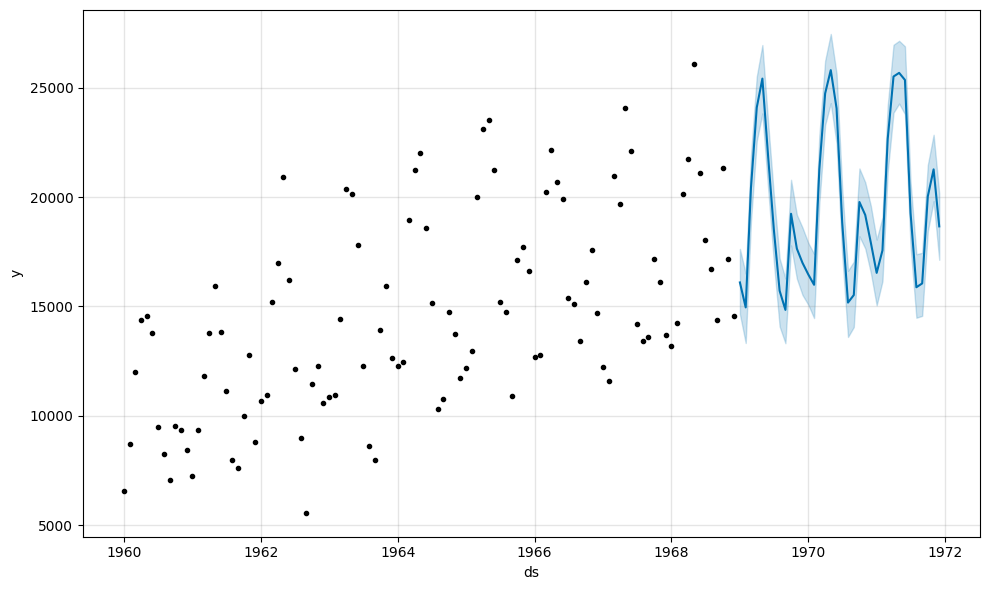

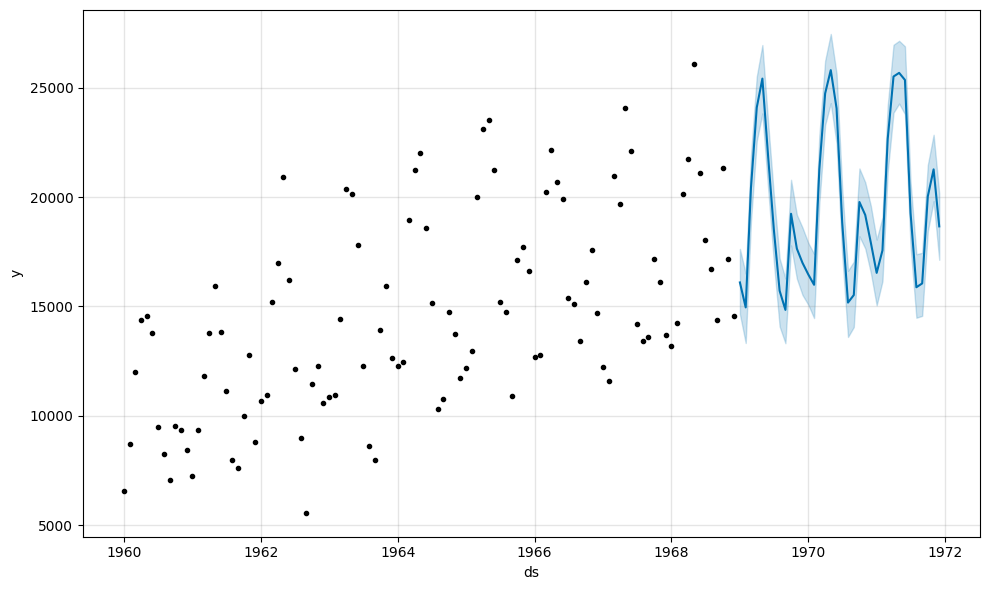

In [46]:
model.plot(forecast)

In [30]:
df

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587
...,...,...
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180


In [47]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1969-01-01,16107.318303,14652.239098,17632.716149,16107.318303,16107.424202,-8.375151,-8.375151,-8.375151,2484.917109,...,296.397039,296.397039,296.397039,-2789.689298,-2789.689298,-2789.689298,0.0,0.0,0.0,16098.943152
1,1969-02-01,16166.374341,13329.327997,16503.245248,16165.596854,16167.547829,-1208.370955,-1208.370955,-1208.370955,2484.917109,...,-897.810967,-897.810967,-897.810967,-2795.477096,-2795.477096,-2795.477096,0.0,0.0,0.0,14958.003386
2,1969-03-01,16219.715278,18879.812057,21896.261583,16217.370318,16222.702693,4199.686993,4199.686993,4199.686993,2484.917109,...,-897.810967,-897.810967,-897.810967,2612.580852,2612.580852,2612.580852,0.0,0.0,0.0,20419.402272
3,1969-04-01,16278.771316,22564.101425,25511.061618,16274.311889,16284.215880,7817.877892,7817.877892,7817.877892,2484.917109,...,447.964727,447.964727,447.964727,4884.996057,4884.996057,4884.996057,0.0,0.0,0.0,24096.649209
4,1969-05-01,16335.922321,23825.580367,26952.126707,16329.114741,16344.226981,9081.895187,9081.895187,9081.895187,2484.917109,...,264.051935,264.051935,264.051935,6332.926143,6332.926143,6332.926143,0.0,0.0,0.0,25417.817508
5,1969-06-01,16394.978359,20363.496955,23378.919861,16385.322682,16405.948237,5425.694281,5425.694281,5425.694281,2484.917109,...,-497.106274,-497.106274,-497.106274,3437.883446,3437.883446,3437.883446,0.0,0.0,0.0,21820.672640
6,1969-07-01,16452.129364,17065.093010,20113.978882,16439.539476,16467.079972,2081.604266,2081.604266,2081.604266,2484.917109,...,447.964727,447.964727,447.964727,-851.277569,-851.277569,-851.277569,0.0,0.0,0.0,18533.733630
7,1969-08-01,16511.185402,14089.255225,17193.434316,16495.317811,16529.890948,-792.476034,-792.476034,-792.476034,2484.917109,...,-56.785647,-56.785647,-56.785647,-3220.607496,-3220.607496,-3220.607496,0.0,0.0,0.0,15718.709368
8,1969-09-01,16570.241440,13318.501257,16282.507262,16550.547307,16593.188860,-1727.413045,-1727.413045,-1727.413045,2484.917109,...,443.289188,443.289188,443.289188,-4655.619341,-4655.619341,-4655.619341,0.0,0.0,0.0,14842.828395
9,1969-10-01,16627.392444,17791.332481,20792.643488,16603.684616,16653.827468,2610.780740,2610.780740,2610.780740,2484.917109,...,296.397039,296.397039,296.397039,-170.533408,-170.533408,-170.533408,0.0,0.0,0.0,19238.173184


In [48]:
new = forecast[['ds','yhat']]

In [50]:
new.columns = ['ds','y']

In [51]:
new.shape

(36, 2)

In [52]:
df.shape

(108, 2)

In [53]:
new.columns, df.columns

(Index(['ds', 'y'], dtype='object'), Index(['ds', 'y'], dtype='object'))

In [54]:
newdf = pd.concat([df, new])

In [55]:
newdf.shape

(144, 2)

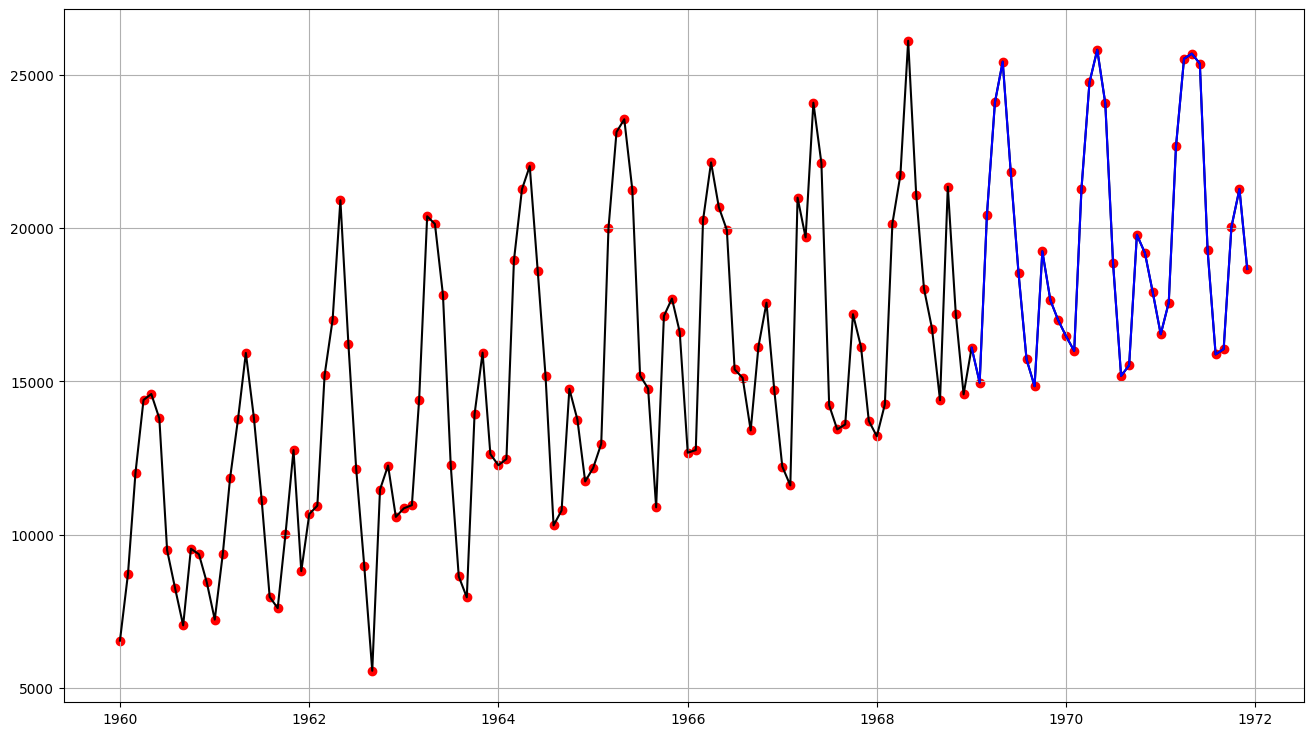

In [57]:
# explore the data
plt.figure(figsize=(16,9))
plt.grid()
plt.scatter(newdf['ds'], newdf['y'], color='r')
plt.plot(newdf['ds'], newdf['y'], color='k')
plt.plot(new['ds'], new['y'], color = 'b')

#### Predicting the sealevel

In [59]:
# https://mitu.co.in/dataset
df = pd.read_csv('sealevel.csv')

In [60]:
df

,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,1993,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57
1,1993,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11
2,1993,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58
3,1993,297483.19,-42.67,90.75,-39.67,-42.65,90.74,-39.64,-38.34
4,1993,321635.81,-37.86,90.26,-38.75,-37.83,90.25,-38.72,-37.21
...,...,...,...,...,...,...,...,...,...
1043,2021,334929.31,49.26,85.01,49.78,56.17,84.76,56.69,60.49
1044,2021,338042.09,50.49,85.94,49.66,57.42,85.65,56.57,60.56
1045,2021,337369.81,49.65,84.02,49.58,56.57,83.78,56.50,60.53
1046,2021,335464.09,47.46,82.66,49.54,54.41,82.45,56.46,60.36


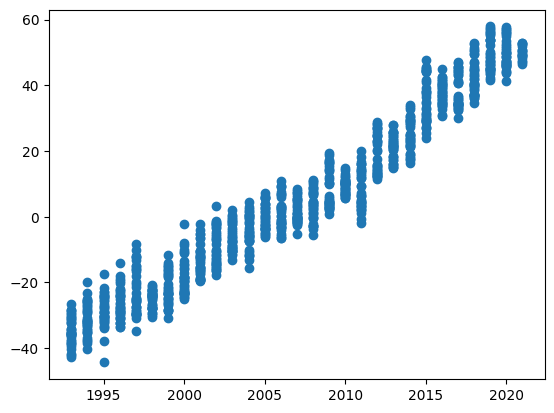

In [64]:
plt.scatter(df['Year'], df['GMSL_noGIA'])

In [63]:
df['Year'].value_counts()

Year
1993    37
1994    37
2019    37
2018    37
2017    37
2016    37
2015    37
2013    37
2012    37
2011    37
2010    37
2009    37
2007    37
2005    37
2004    37
2003    37
2001    37
2000    37
1999    37
1998    37
1997    37
1995    37
2006    36
2008    36
2002    36
2014    36
1996    36
2020    36
2021    18
Name: count, dtype: int64

In [66]:
gr = df.groupby('Year')

In [68]:
gr.groups;

In [69]:
newdf = pd.DataFrame({
    'ds': gr.mean().index,
    'y': gr.mean()['GMSL_noGIA']
})

In [70]:
newdf

,ds,y
Year,,
1993,1993,-34.605405
1994,1994,-30.951081
1995,1995,-28.645946
1996,1996,-26.596389
1997,1997,-22.682432
1998,1998,-25.060541
1999,1999,-21.812432
2000,2000,-18.425405
2001,2001,-13.219189


In [71]:
pd.to_datetime(newdf['ds'], format='%Y')

Year
1993   1993-01-01
1994   1994-01-01
1995   1995-01-01
1996   1996-01-01
1997   1997-01-01
1998   1998-01-01
1999   1999-01-01
2000   2000-01-01
2001   2001-01-01
2002   2002-01-01
2003   2003-01-01
2004   2004-01-01
2005   2005-01-01
2006   2006-01-01
2007   2007-01-01
2008   2008-01-01
2009   2009-01-01
2010   2010-01-01
2011   2011-01-01
2012   2012-01-01
2013   2013-01-01
2014   2014-01-01
2015   2015-01-01
2016   2016-01-01
2017   2017-01-01
2018   2018-01-01
2019   2019-01-01
2020   2020-01-01
2021   2021-01-01
Name: ds, dtype: datetime64[ns]

In [72]:
# prepare expected column names
newdf.columns = ['ds', 'y']
newdf['ds']= pd.to_datetime(newdf['ds'], format='%Y')

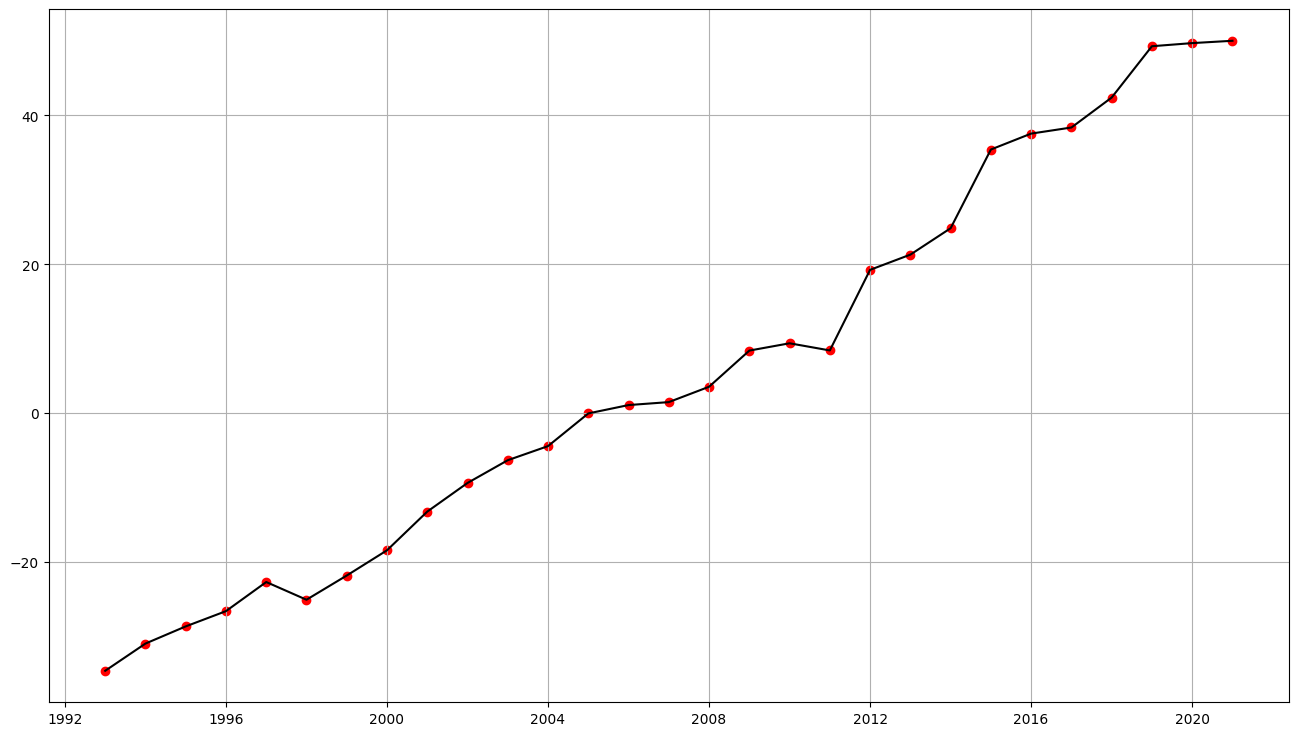

In [73]:
# explore the data
plt.figure(figsize=(16,9))
plt.grid()
plt.scatter(newdf['ds'], newdf['y'], color='r')
plt.plot(newdf['ds'], newdf['y'], color='k')

In [75]:
model = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
model.fit(newdf)

19:08:13 - cmdstanpy - INFO - Chain [1] start processing
19:08:14 - cmdstanpy - INFO - Chain [1] done processing


In [76]:
# define the period for which we want a prediction
future = list()
for i in range(2022, 2031):
    date = str(i)
    future.append([date])

In [77]:
future

[['2022'],
 ['2023'],
 ['2024'],
 ['2025'],
 ['2026'],
 ['2027'],
 ['2028'],
 ['2029'],
 ['2030']]

In [78]:
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'], format='%Y')

In [79]:
future

,ds
0,2022-01-01
1,2023-01-01
2,2024-01-01
3,2025-01-01
4,2026-01-01
5,2027-01-01
6,2028-01-01
7,2029-01-01
8,2030-01-01


In [80]:
forecast = model.predict(future)

In [81]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,95.777996,45.985142,54.811381,95.777618,95.778313,-45.613280,-45.613280,-45.613280,91.467478,...,-1.737257,-1.737257,-1.737257,-135.343501,-135.343501,-135.343501,0.0,0.0,0.0,50.164716
1,2023-01-01,98.882534,50.857375,59.724809,98.881393,98.883604,-43.419752,-43.419752,-43.419752,91.467478,...,0.520306,0.520306,0.520306,-135.407536,-135.407536,-135.407536,0.0,0.0,0.0,55.462782
2,2024-01-01,101.987071,54.246648,62.621865,101.984960,101.989104,-43.505970,-43.505970,-43.505970,91.467478,...,0.217960,0.217960,0.217960,-135.191407,-135.191407,-135.191407,0.0,0.0,0.0,58.481102
3,2025-01-01,105.100114,58.474716,67.170094,105.096895,105.103290,-42.248919,-42.248919,-42.248919,91.467478,...,1.282956,1.282956,1.282956,-134.999353,-134.999353,-134.999353,0.0,0.0,0.0,62.851195
4,2026-01-01,108.204652,59.660691,68.562040,108.199947,108.209136,-44.180646,-44.180646,-44.180646,91.467478,...,-0.304622,-0.304622,-0.304622,-135.343501,-135.343501,-135.343501,0.0,0.0,0.0,64.024006
5,2027-01-01,111.309189,63.097815,72.095476,111.302963,111.314862,-43.817544,-43.817544,-43.817544,91.467478,...,0.122514,0.122514,0.122514,-135.407536,-135.407536,-135.407536,0.0,0.0,0.0,67.491645
6,2028-01-01,114.413727,64.521736,73.225535,114.405768,114.420936,-45.461186,-45.461186,-45.461186,91.467478,...,-1.737257,-1.737257,-1.737257,-135.191407,-135.191407,-135.191407,0.0,0.0,0.0,68.952540
7,2029-01-01,117.526770,69.677624,78.994459,117.517246,117.535688,-43.313915,-43.313915,-43.313915,91.467478,...,0.217960,0.217960,0.217960,-134.999353,-134.999353,-134.999353,0.0,0.0,0.0,74.212855
8,2030-01-01,120.631307,72.207267,80.961072,120.619700,120.641932,-43.977880,-43.977880,-43.977880,91.467478,...,-0.101856,-0.101856,-0.101856,-135.343501,-135.343501,-135.343501,0.0,0.0,0.0,76.653427


/home/mitu/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/mitu/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


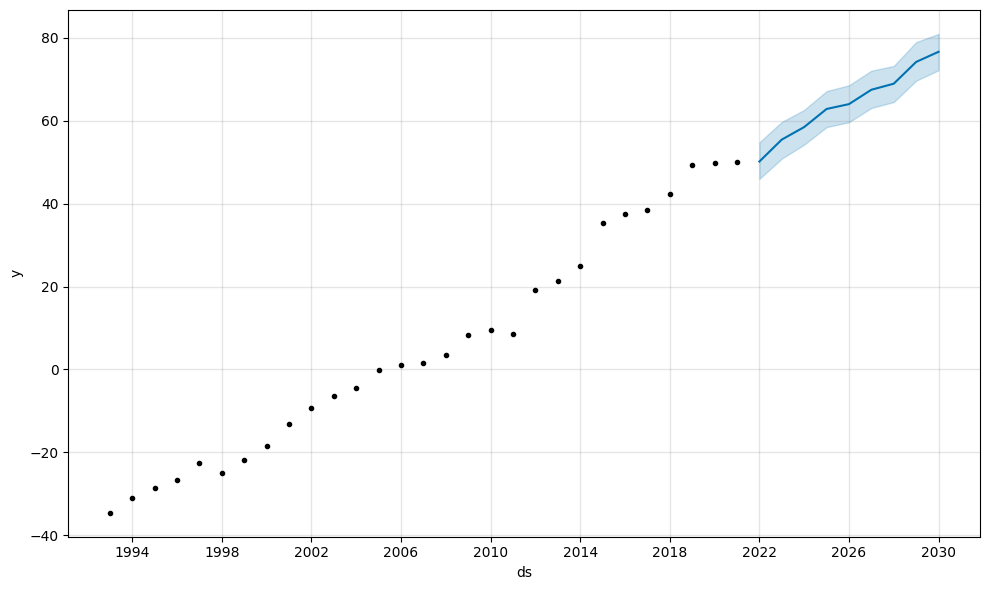

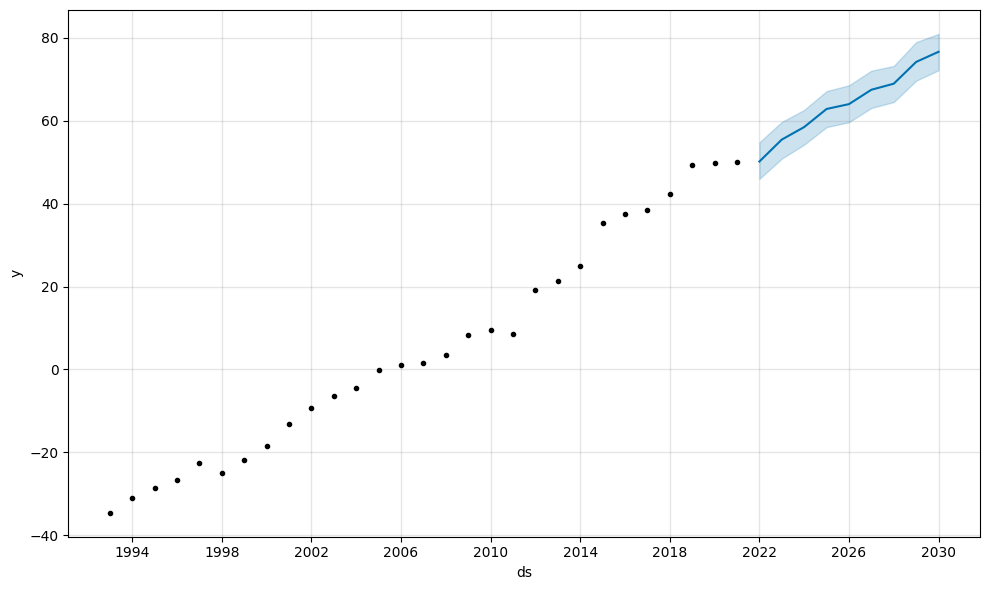

In [82]:
model.plot(forecast)